In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'E:/Dataset/Train'
valid_path = 'E:/Dataset/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('E:/Dataset/Train/*')

In [7]:
folders

['E:/Dataset/Train\\Parasite', 'E:/Dataset/Train\\Uninfected']

In [8]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:

from tensorflow.keras.layers import MaxPooling2D

In [12]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:

# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('E:/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [16]:

training_set

In [17]:

test_set = test_datagen.flow_from_directory('E:/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [18]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 25s 2s/step - loss: 1.5884 - accuracy: 0.5096 - val_loss: 0.7208 - val_accuracy: 0.3433
Epoch 2/50
13/13 [==============================] - 16s 1s/step - loss: 0.6939 - accuracy: 0.5312 - val_loss: 0.6691 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 23s 2s/step - loss: 0.6813 - accuracy: 0.5577 - val_loss: 0.6893 - val_accuracy: 0.5672
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.6683 - accuracy: 0.6082 - val_loss: 0.7326 - val_accuracy: 0.3507
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 0.6202 - accuracy: 0.7236 - val_loss: 0.7132 - val_accuracy: 0.4179
Epoch 6/50
13/13 [==============================] - 16s 1s/step - loss: 0.5397 - accuracy: 0.7668 - val_loss: 1.0666 - val_accuracy: 0.3582
Epoch 7/50
13/13 [==============================] - 18s 1s/step - loss: 0.4472 - accuracy: 0.7788 - val_loss: 0.8883 - val_accuracy: 0.4030
Epoch 8/50
13/13 [==

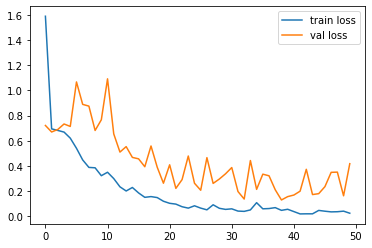

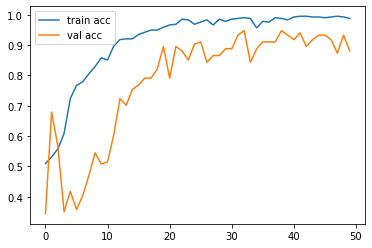

<Figure size 432x288 with 0 Axes>

In [19]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [21]:

y_pred = model.predict(test_set)

In [22]:

y_pred

array([[2.02557724e-02, 9.79744196e-01],
       [9.99913216e-01, 8.67295821e-05],
       [1.29488492e-02, 9.87051129e-01],
       [9.99974012e-01, 2.60410870e-05],
       [2.43490795e-03, 9.97565150e-01],
       [6.13422573e-01, 3.86577398e-01],
       [1.99543335e-03, 9.98004615e-01],
       [8.57651699e-04, 9.99142289e-01],
       [3.01548699e-03, 9.96984541e-01],
       [4.29877788e-02, 9.57012177e-01],
       [7.36778427e-04, 9.99263227e-01],
       [9.99970794e-01, 2.91889137e-05],
       [7.73644214e-03, 9.92263556e-01],
       [9.44785297e-01, 5.52147068e-02],
       [9.76000726e-01, 2.39992440e-02],
       [1.00000000e+00, 4.88520058e-11],
       [2.59137736e-03, 9.97408569e-01],
       [1.00436127e-02, 9.89956379e-01],
       [3.72753158e-04, 9.99627233e-01],
       [9.99999285e-01, 6.98682641e-07],
       [9.99869347e-01, 1.30677698e-04],
       [3.25933039e-01, 6.74066961e-01],
       [9.99999285e-01, 7.51762741e-07],
       [4.39571701e-02, 9.56042886e-01],
       [9.999279

In [23]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_vgg19.h5')

In [58]:
img=image.load_img('E:/Dataset/Test/Uninfected/3.png',target_size=(224,224))

In [59]:

x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [60]:

x.shape

(224, 224, 3)

In [61]:

x=x/255

In [62]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [63]:

model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [67]:

a=np.argmax(model.predict(img_data), axis=1)


In [68]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
